# Laboratorio 1: Eliminación de anomalías y ajuste de intensidad en imágenes

### Por: Octavio Perez Bravo

# Introduccion y objetivos
<div style="text-align: justify">
Durante esta actividad se emplean metodologias para la deteccion y eliminacion de anomalias y ruido en imagen. El proposito de este laboratorio es la presentacion de diversas tecnicas que permiten la immplementacion de filtros que corrigan la imagen. El uso de filtros y modelos estadisticos para la eliminacion de ruido presenta una meta imprtante para diversos sectores como lo pdrian ser:

**Seguridad:** Resaltar y pulird imagenes de baja calidad para la identificacion de pistas o personas de interes en imagenes aumentadas desde camaras de seguridad, o fotografias de escenas de crimen. <br>
**Astronomia:** Aun con la potente instrumentacion al alcance de las organizaciones cientificas, las imagenes capturadas de objetos o fenomenos que se encuentran a distancias monumentales la calidad de las muestras obtenidas puede resultar con ruido o anomalias inesperadas. <br>
**Geografia:** Gracias a las imagenes satelitales cada vez es mas facil hacer mapas o cartografia en sitios inaccesibles para el ser humano. sin embargo estas imagenes satelitales suelen venir con anomalias o ruidos que pueden afectar la identificacion de zonas de interes. <br>
**Arqueologia e Historia:** La restauracion de fotografias antiguas, pinturas o bocetos que debido al paso del tiempo se han deteriorado representa una oportunidad para los arqueologos e historiadores en encontrar nuevos detalles y perseverar las obras de autores de interes. <br>
**Artes visuales:** Tanto en el cine, el dibujo artistico y otras artes visuales el uso de metodos estadisticos o de machine learning para la correccion de imagenes presenta una nueva oportunidad para las artes visuales en mejorar algunas tecnicas o expolorar nuevos panoramas artisticos. <br>
**Periodismo:** Tanto la restauracion de fotografias antiguas como el pulir las fotografias tomadas al momento de un articulo, la eliminacion de anomalias y ajustes de imagen permiten a los periodistas corregir las imagenes capturadas para una presentacion de mayor impacto. <br>
<br>
Teniendo en cuenta todas las opoirtunidades que se presentan a partir de la eliminacion de anomalias y ajustes de intensidad, este trabajo tiene como objetivo presentar algunas tecnicas que permitan eliminar el ruido del tipo "sal y pimienta" y ajuste de intensidad. 
<br>
Para facilitar el mantenimiento y la legibilidad de este trabajo. En esta primera etapa se procede a definir algunas de las funciones mas recurrentes que seran usadas a lo largo de este trabajo. y conforme estas funciones sean llamadas seran explicadas. </div>

In [ ]:
# Importacion de paquetes necesarios para este trabajo
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
# Funcion para comparar imagen original e imagen modificada
def comparar_imagenes(original=None, imagenes=[], titulos=[], size=10):
    # Validar entradas
    if original is None or len(imagenes) == 0 or len(titulos) == 0:
        raise ValueError('Debe proporcionar la imagen original, las imágenes a comparar y sus titulos')
    if len(imagenes) != len(titulos):
        raise ValueError('El número de imagenes y titulos debe coincidir')
    w, h = original.shape[0], original.shape[1]
    aspect_ratio = w / h
    plt.figure(figsize=(size * aspect_ratio, size))
    for i in range(len(imagenes)):
        plt.subplot(1, len(imagenes), i + 1)
        plt.axis("off")
        plt.imshow(cv.cvtColor(imagenes[i], cv.COLOR_BGR2RGB))
        plt.title(titulos[i])      
    plt.tight_layout()
    plt.show()
# Funcion para leer imagenes
def leer_imagen(path = '', grey_scale = False):
    if grey_scale == False:
        imagen = cv.imread(path)
    else:
        imagen = cv.imread(path,cv.IMREAD_GRAYSCALE)
    return imagen

# Eliminacion de ruido sal y pimienta

<div style="text-align: justify">
El ruido "sal y pimienta" se caracteriza por pixeles completamente blancos (sal) y pixeles completamente negros (pimienta) distribuidos aleatoriamente en una imagen. y existen multiples causas que pueden producir una imagen ruidosa por "sal y pimienta" como lo son errores en la conversion analogico a digital, pixeles corruptos en sensores de las camaras o errores durante la transmision de una imagen como lo que solia ocurrir con televisores antiguos que tenian problemas con la recepcion de la senal.
</div>

Muestras fotograficas originales


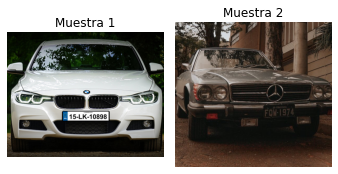

Muestras fotograficas en blanco y negro


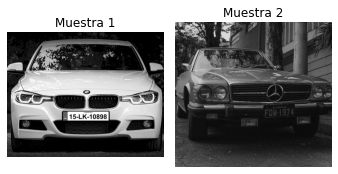

In [ ]:
# Lectura de imagenes usando el modulo de CV
imagen01 = leer_imagen('CochesVarios/Cars167.png')
imagen02 = leer_imagen('CochesVarios/coche11.jpeg')
print("Muestras fotograficas originales")
comparar_imagenes(original=imagen01,  imagenes = [imagen01, imagen02], 
                  titulos = ['Muestra 1', 'Muestra 2'], size=6)
# Convertir las imagenes en escalas de grises
imagen01 = leer_imagen('CochesVarios/Cars167.png', True)
imagen02 = leer_imagen('CochesVarios/coche11.jpeg', True)
print("Muestras fotograficas en blanco y negro")
comparar_imagenes(original=imagen01,  imagenes = [imagen01, imagen02], 
                  titulos = ['Muestra 1', 'Muestra 2'], size=6)

## Agregar Ruido

<div style="text-align: justify">
Una vez completada la lectura de las imagenes y su conversion a escala de grises se procede a agregar el ruido de "sal y pimienta" la agregacion de este ruido se logra a partir de la modificacion de pixeles seleccionados aleatoriamente en la imagen a escala de grises. La primera parte consiste en generar una matriz del mismo tamano de la resolucion de la imagen original, esta matriz se llena con valores generados aleatoriamente entre 0 y 1. A partir de la matriz generada se compara con cada pocison de la matriz contra la pocision de cada pixel de la imagen original. Estos pixeles son modificados a blanco (sal) si el valor aleatorio generado es menor a la probabilidad dividida entre 2 o a negro (pimienta) si el valor aleatorio generado es igual a 1-probabilidad dividido entre 2
</div>

Agregar ruido a la primera muestra


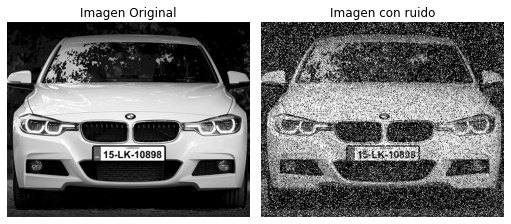

Agregar ruido a la segunda muestra


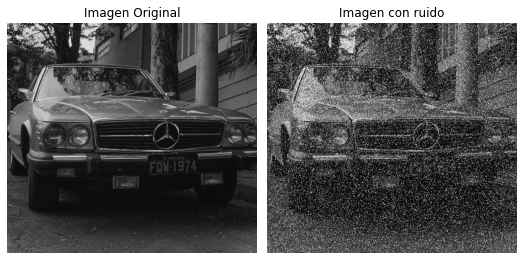

In [ ]:
# Funcion para agregar ruido de sal y pimienta toma una imagen original (sin ruido)
# y modificara pixeles aleatorios a negro o blanco con una probabilidad default de 20%
def agregar_ruido(original = None, probabilidad=0.20):
    ruidosa = original.copy()
    ruido = np.random.rand(*original.shape)
    ruidosa[ruido < probabilidad/2] = 255  # Sal (blanco)
    ruidosa[ruido > 1-probabilidad/2] = 0  # Pimienta (negro)
    return ruidosa

imagen01_ruido = agregar_ruido(original = imagen01, probabilidad=0.30)
imagen02_ruido = agregar_ruido(original = imagen02, probabilidad=0.20)
print("Agregar ruido a la primera muestra")
comparar_imagenes(original=imagen01,  imagenes = [imagen01, imagen01_ruido], 
                  titulos = ['Imagen Original', 'Imagen con ruido'], size=9)
print("Agregar ruido a la segunda muestra")
comparar_imagenes(original=imagen02,  imagenes = [imagen02, imagen02_ruido], 
                  titulos = ['Imagen Original', 'Imagen con ruido'], size=8)

## Correcion de ruido sal y pimienta: Filtro de Mediana

<div style="text-align: justify">
Una de las tecnicas mas populares para la eliminacion de ruido del tipo "sal y pimienta" es mediante la implementacion de tecnicas estadisticas debido a que como se explico previamente una imagen puede ser considerada como una matriz bidimensional debido a que la pocision de un pixel en la imagen y el valor como la intensidad del pixel en escala de grises. Una de las tecnicas mas populares para la eliminacion de este tipo de ruido es el filtro de mediana el cual sigue los siguientes pasos:

1. Convertir la imagen ruidosa en un array de numpy para realizar las operaciones matematicas sobre la matriz obtenida y generar una matriz de 0s con la resolucion de la imagen
2. Seleccionar una ventana de comparacion (tamano del filtro) desde un elemento central en el pixel procesado representado como Pij
3. Si el elemento central Pij no es interpretado como un pixel corrompido (0 < Pij < 255) entonces se deja el valor sin cambiar
4. Si Pij tiene un valor de 0 o 255 entonces se le puede considerar como valor corrupto
5. En el caso de que todos los elementos de la ventana sean ruidosos (0 o 255) entonces se reemplaza el valor de Pij por la mediana de los elementos en la ventana entonces se almacena el valor en un array temporal
6. El proceso se itera para todas las pocisiones Pij de la imagen.
7. Una vez procesados todos los elementos Pij de la imagen, los valores no corruptos de cada pocision sustituyen la misma pocision en la matriz de 0s, mientras que los valores corruptos son sustituidos con la mediana de la ventana almacenada en el array temporal.
8. Convertimos el array final a una imagen.
</div>

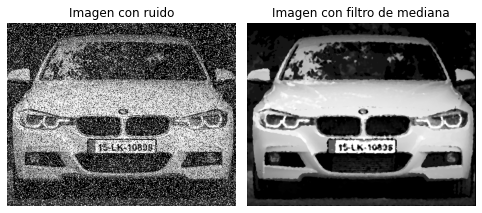

In [ ]:
# Implementacion manual de un filtro de mediana
def filtro_mediana(imagen, tamano_filtro):
    array = np.array(imagen)
    temp = [] # Array temporal para almacenar valores
    indexador = tamano_filtro // 2
    #array_final = []
    array_final = np.zeros((len(array),len(array[0])))
    # Iteracion sobre todos los valores en el eje horizontal P(i)
    for i in range(len(array)):
    # Iteracion sobre todos los pixeles en el eje vertical P(j)
        for j in range(len(array[0])):
    # iteracion sobre la ventana seleccionada del filtro.
            for ventana in range(tamano_filtro):
                if i + ventana - indexador < 0 or \
                    i + ventana - indexador > len(array) - 1:
                    for c in range(tamano_filtro):
                        temp.append(0)
                else:
                    if j + ventana - indexador < 0 or \
                          j + indexador > len(array[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(tamano_filtro):
                            temp.append(array[i + ventana - indexador]
                                        [j + k - indexador])
            temp.sort()
    # Calcula la mediana para el elemento P(ij) con el
    #  tamano del array dividido entre 2
            array_final[i][j] = temp[len(temp) // 2]
            temp = []
    # Convertir array de float64 a Unit8
    min = array_final.min()
    max = array_final.max()
    imagen_normalizada = 255 * (array_final - min) / (max - min)
    imagen_uint8 = imagen_normalizada.astype('uint8')
    return imagen_uint8

imagen01_filtrada = filtro_mediana(imagen01_ruido, 5)
imagen02_filtrada = filtro_mediana(imagen02_ruido, 5)
comparar_imagenes(original=imagen01,  
                  imagenes = [imagen01_ruido, imagen01_filtrada], 
                  titulos = ['Imagen con ruido', 'Imagen con filtro de mediana'], 
                  size=8.5)

### Filtro De Non-Local Means

<div style="text-align: justify">
Aunque Open cv cuenta con su propia funcion para un filtro de mediana que es el (cv2.medianBlur) para los propositos de este trabajo se exploraro el uso de otros filtros de la libreria openCV eligiendo el filtro Non-Local Means (NLM). Este filtro es una técnica avanzada de reducción de ruido que funciona identificando patrones similares en la imagen, incluso si están lejos entre sí. En lugar de considerar únicamente los píxeles cercanos, busca similitudes en un área más amplia, lo que ayuda a preservar texturas y detalles. 
<br>
cv2.fastNlMeansDenoising(src, dst=None, h=10, templateWindowSize=7, searchWindowSize=21)
</div>

#### Parametros Non-Local Means ####
***src***: Imagen de entrada.<br>
***dst***: Imagen de salida (opcional, la función devuelve la imagen si no se especifica).<br>
***h***: Filtro de intensidad para ruido luminancia (mayores valores eliminan más ruido pero suavizan más detalles).<br>
***templateWindowSize***: Tamaño de la ventana usada como bloque de referencia (debe ser impar, usualmente 7).<br>
***searchWindowSize***: Tamaño del área de búsqueda para bloques similares (también debe ser impar, usualmente 21).<br>

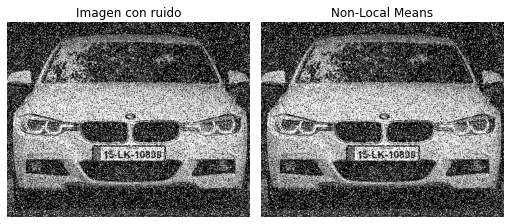

In [ ]:
# Implementacion mediante Filtro de opencv
import cv2
imagen01_filtradacv = cv2.fastNlMeansDenoising(imagen01_ruido, 10, 10, 7, 50)
imagen02_filtradacv = cv2.fastNlMeansDenoising(imagen02_ruido, 10, 10, 7, 50)
comparar_imagenes(original=imagen01,  imagenes = [imagen01_ruido, imagen01_filtradacv], 
                  titulos = ['Imagen con ruido', 'Non-Local Means'], size=9)

## Comparacion cuantitativa de restauracion de imagenes

<div style="text-align: justify">
Para poder comparar la restauracion de las imagenes se aplicara la tecnica cuantitativa PSNR (Peak Signal-to-Noise Ratio) esta tecnica permite comparar el ruido de una imagen en comparacion de una muestra original. 
<br>
**Formula PSNR**
<br>
El PSNR Se define en términos de la relación entre la intensidad máxima posible de un píxel y el error cuadrático medio.<br>

$$PSNR = 20* log_{10} \left(\frac{MAX_I}{\sqrt{\text{MSE}}}\right)$$

**Formula Mean Square Error** <br>
(Error Cuadrático Medio) mide la diferencia promedio entre los píxeles correspondientes de las dos imágenes.
$$MSE = \frac{1}{m \cdot n} \sum_{i=1}^{m} \sum_{j=1}^{n} \left[ I_{\text{original}}(i,j) - I_{\text{restaurada}}(i,j) \right]^2$$


**Interpretación del PSNR** <br>

* Valores altos: Indican que la imagen procesada es muy similar a la original (menos ruido o distorsión).
* Valores bajos: Indican mayor diferencia entre la imagen original y la procesada, lo que implica más distorsión.
</div>

In [ ]:
# Función para calcular el MSE
def calcular_mse(original, restaurada):
    return np.mean((original - restaurada) ** 2)
# Función para calcular el PSNR
def calcular_psnr(original, restaurada):
    mse = calcular_mse(original, restaurada)
    if mse == 0:  
        return float('inf')  
    max_pixel = 255.0 
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr
# Calcular PSNR con el promedio de ambas imagenes
psnr_cv = (calcular_psnr(imagen01, imagen01_filtradacv) + calcular_psnr(imagen02, imagen02_filtradacv))/2
psnr_manual = (calcular_psnr(imagen01, imagen01_filtrada) + calcular_psnr(imagen02, imagen02_filtrada))/2
psnr_ruido = calcular_psnr(imagen01, imagen01_ruido)
print(f"PSNR para metodo de CV: {psnr_cv:.2f} dB")
print(f"PSNR para metodo manual: {psnr_manual:.2f} dB")

PSNR para metodo de CV: 34.32 dB
PSNR para metodo manual: 31.36 dB


## Conclusiones de Filtrado
<div style="text-align: justify">
A partir de los resulatdos obtenidos a partir del PSNR de ambos metodos se puede concluir que aunque el metodo de filtro de mediana manual produce una imagen con menor filtrado no agrega tanta distorcion como el metodo de open cv el cual reduce mas el ruido sal y pimienta, sin embargo produce una imagen menos pristina. Asi que dependiendo de las necesidades finales del usuario puede seleccionar cual de ellas es mas conveniente para el resultado final esperado.
</div>

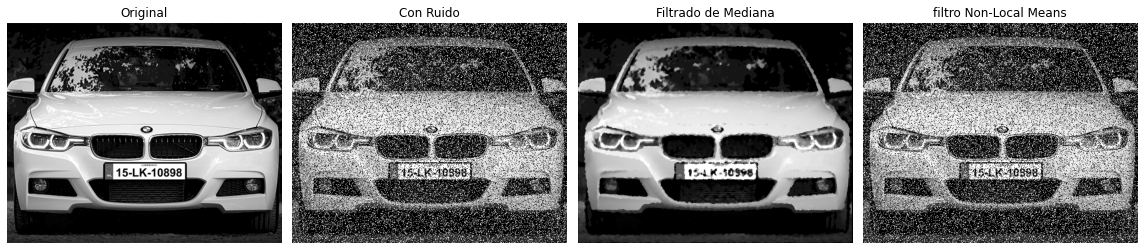

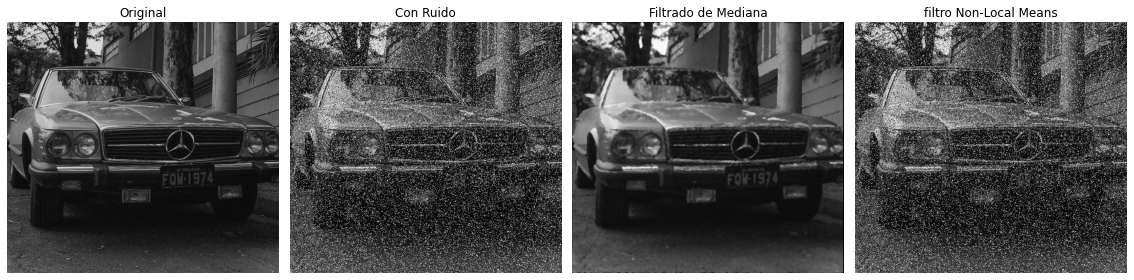

In [72]:
comparar_imagenes(original= imagen01, imagenes = [imagen01, imagen01_ruido, imagen01_filtrada,  imagen01_filtradacv],
                  titulos = ['Original', 'Con Ruido', 'Filtrado de Mediana', "filtro Non-Local Means"], size = 20)
comparar_imagenes(original= imagen02, imagenes = [imagen02, imagen02_ruido, imagen02_filtrada,  imagen02_filtradacv],
                  titulos = ['Original', 'Con Ruido', 'Filtrado de Mediana', "filtro Non-Local Means"], size = 17.2)

# Ajuste de intensidad

<div style="text-align: justify">
Ademas de la eliminacion de ruido otra de las operaciones principales que e pueden aplicar sobre las imagenes es el ajuste de intensidad para detectar detalles que pueden no ser perceptibles a simple vista  y requieren transformaciones especiales para extraer el conocimiento necesario sobre ellas y precindir de aquellos detalles innecesarios de la imagen. Las tecnicas de ajuste de intensidad deben ser aplicadas en concreto para las situaciones espaecificas de cada imagen y el conocimiento que se quiere extraer de ellas, un claro ejemplo de esto es el uso de transformaciones inversas para la deteccion de lesiones en radiografias o la conversion a negativos en fotografias con muy poca luz o colores muy similares enmascarando los detalles sobre los cuales se quere extraer informacion. 
<br>
De las imagenes proporcionadas en el dataset se han seleccionado las  siguientes imagenes debido a que la luz refleja sobre los colores de los autos, por lo tanto un ajuste de contraste podria mejorar la definicion de las imagenes.
</div>

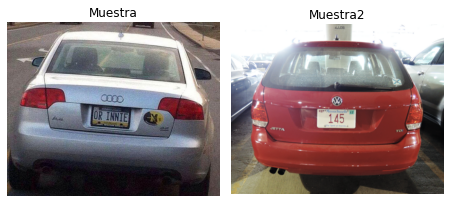

In [77]:
imagen03 = leer_imagen('CochesVarios/Cars296.png')
imagen04 = leer_imagen('CochesVarios/Cars65.png')

comparar_imagenes(original =  imagen03, imagenes = [imagen04, imagen03],
                  titulos = ['Muestra', 'Muestra2'], size = 8)

## Suavizado y realce mediante operadores aritmeticos
<div style="text-align: justify">
Para lograr un realce de operaciones se logra utilizando operaciones aritmeticas basicas mediante la comparacion de una matriz plana que sera sumada o restada pixel a pixel mediante su pocision en P(ij) al aumentar o disminuir los valores de los pixeles se pueden representar con mayor claridad las tonalidades claras y los oscuras. Estas operaciones aritmeticas lineales aplicadas a la imagen original pueden ayudar para obtener informacion valiosa de las imagenes que sin este realce no hubiera sido posible.

**Suma**
$$ C(x,y) = B(x,y) + A(x,y)$$
**Resta**
$$ C(x,y) = B(x,y) - A(x,y)$$
</div>

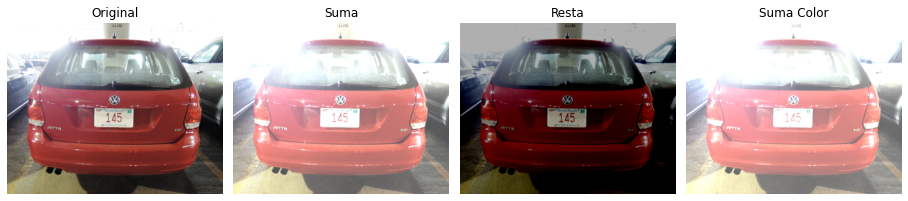

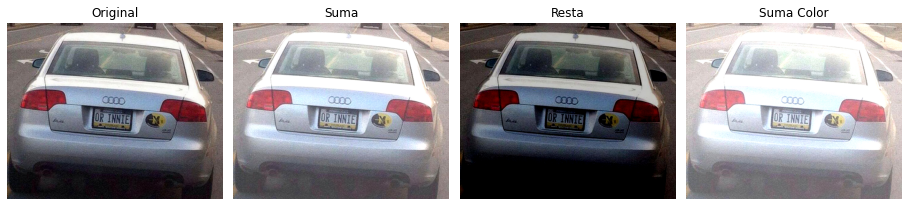

In [ ]:
M_03 = np.ones(imagen03.shape, dtype = "uint8") * 80
M_04 = np.ones(imagen04.shape, dtype = "uint8") * 60
constante_M_03 = np.ones_like(imagen03) * 100
constante_M_04 = np.ones_like(imagen04) * 100

imagen03_suma = np.clip(imagen03.astype(np.int16) + M_03, 0, 255).astype(np.uint8)
imagen04_suma = np.clip(imagen04.astype(np.int16) + M_04, 0, 255).astype(np.uint8)

imagen03_resta = np.clip(imagen03.astype(np.int16) - M_03, 0, 255).astype(np.uint8)
imagen04_resta = np.clip(imagen04.astype(np.int16) - M_04, 0, 255).astype(np.uint8)

imagen03_suma_color = np.clip(imagen03.astype(np.int16) + constante_M_03, 0, 255).astype(np.uint8)
imagen04_suma_color = np.clip(imagen04.astype(np.int16) + constante_M_04, 0, 255).astype(np.uint8)

comparar_imagenes(original =  imagen03, imagenes = [imagen03, 
                imagen03_suma, imagen03_resta, imagen03_suma_color],
                  titulos = ['Original', 'Suma', 'Resta', 'Suma Color'], size = 16)
comparar_imagenes(original =  imagen03, imagenes = [imagen04, 
                imagen04_suma, imagen04_resta, imagen04_suma_color],
                  titulos = ['Original', 'Suma', 'Resta', 'Suma Color'], size = 16)

## Igualacion por histograma: OpenCV

<div style="text-align: justify">
La igualación de histograma es una técnica utilizada para mejorar el contraste de una imagen ajustando su distribución de niveles de intensidad. Redistribuye los valores de los píxeles de manera que el histograma de la imagen sea más uniforme, lo que puede ayudar a revelar detalles ocultos en regiones oscuras o brillantes.

Pasos para realizar la igualación de histograma
Calcular el histograma de la imagen original: El histograma muestra la distribución de los niveles de intensidad de los píxeles.

Aplicar la transformación de igualación: Redistribuir los niveles de intensidad para que el histograma tenga una forma más uniforme.

Generar la imagen de salida: Crear una nueva imagen usando los valores transformados.

Visualizar los resultados: Comparar la imagen original y la procesada junto con sus histogramas.

</div>

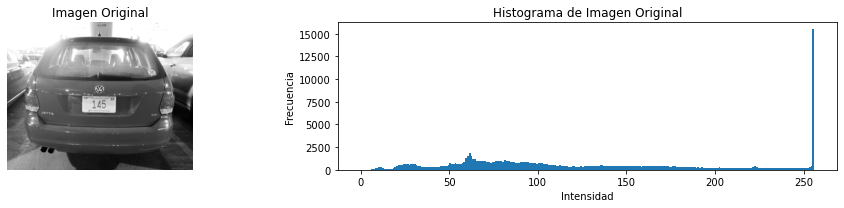

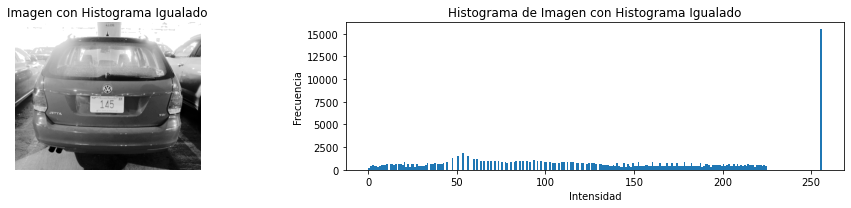

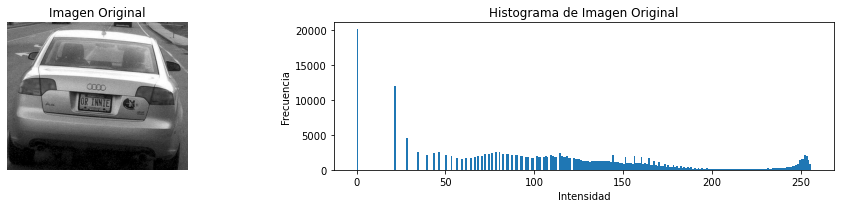

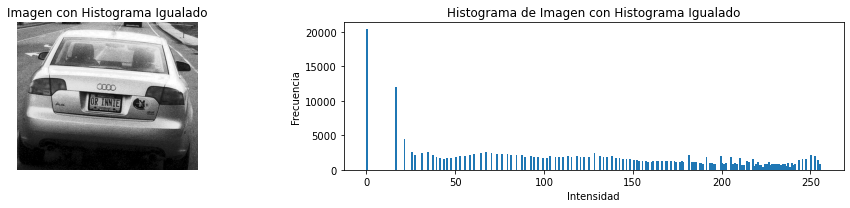

In [ ]:
def mostrar_imagen_histograma(imagen, titulo):
    plt.figure(figsize=(14, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(imagen, cmap='gray')
    plt.title(titulo)
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.hist(imagen.ravel(), bins=256, range=(0, 256))
    plt.title(f"Histograma de {titulo}")
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# Cargar una imagen en escala de grises
imagen03 = leer_imagen("CochesVarios/Cars296.png", True)
imagen04 = leer_imagen("CochesVarios/Cars65.png", True)
# Igualación del histograma
imagen_igualada03 = cv.equalizeHist(imagen03)
imagen_igualada04 = cv.equalizeHist(imagen04)
# Mostrar los resultados
mostrar_imagen_histograma(imagen03, "Imagen Original")
mostrar_imagen_histograma(imagen_igualada03, "Imagen con Histograma Igualado")
mostrar_imagen_histograma(imagen04, "Imagen Original")
mostrar_imagen_histograma(imagen_igualada04, "Imagen con Histograma Igualado")


Imagen mejorada: Mayor contraste y más detalles visibles, especialmente en regiones oscuras o claras.
Histograma igualado: El histograma de la imagen procesada estará más distribuido en el rango de intensidad.


## Conclusiones en ajustes de intensidad

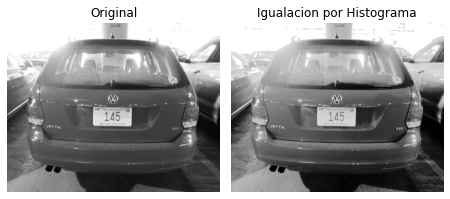

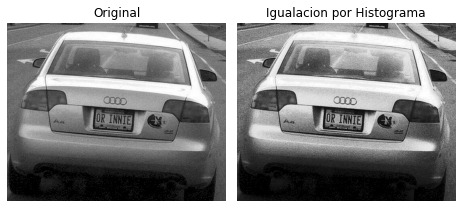

In [ ]:
comparar_imagenes(original =  imagen03, imagenes = [imagen03, imagen_igualada03],
                  titulos = ['Original', 'Igualacion por Histograma'], size = 8)
comparar_imagenes(original =  imagen04, imagenes = [imagen04, imagen_igualada04],
                  titulos = ['Original', 'Igualacion por Histograma'], size = 8)

<div style="text-align: justify">
Tras el ajuste de histograma se observa una mejora sobre los bordes de los objetos como el detalle mas marcdo en la forma de los automoviles que debido a que en las muestras originales estan sobreexpuestas a la luz. Este ajuste facilitaria la identificacion de placas o detalles especificos en los objetos. A diferencia de las tecnicas de eliminacion de anomalias como las expuestas en el modulo anterior, el ajuste de intensidad depende completamente del tipo de imagen y los detalles que se quieren extraer de ellas. Aunque el ajuste mediante hitograma presenta ventajas significativas en el contraste de sombras, los metodos aritmeticos pueden ser usados para otras funciones de contraste. Por ejemplo una funcion resta seria bastente util para imagenes expuestas a mucha luz, mientras una funcion resta ayudaria a exponer detalles en imagenes con muy poca luz.
</div>

# Conclusiones #

<div style="text-align: justify">
A lo largo de este trabajo se han presentado diversas tecnicas e implementaciones de operaciones para el tratamiento y filtrado de imagenes. Como se estipulo en la introduccion de este trabajo el preprocesado de imagenes a traves de la reduccion de ruido, el realce de caracteristicas, la deteccion y elimiacion de anomalias y los ajustes en brillo y contraste ofrecen una amplia ventaja a diversas ciencias para la extraccion de conocimiento efectivo a partir de muestras originales que por circunstancias externas como fallas en los sensores, deterioro de las imagenes por el tiempo o baja calidad debido a las limitaciones tecnologicas de la epoca. <br>
<br>
Este procesamiento consiste en el tratamiento de imagenes como espacios vectoriales donde cada pocision en una matriz bidimensional corresponde a un pixel de la imagen, y el valor en la pocision la intensidad en escala de grises y en color como una tupla con la intensidad de los colores basicos (Verde, Azul y Rojo). Asi, es como se interpreta una imagen de manera matematica. Por lo cual, las operaciones que son posible realizarse sobre matrices en forma de algebra lineal, es posible aplicarlas a las imagenes como se ha observado a lo largo de este trabajo.
</div>

# Bibliografia #
